# Image Segmentation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Short exercise on check

### Histogram of grayscale image

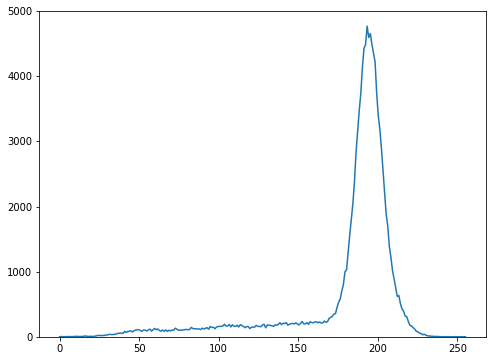

In [2]:
check = plt.imread('cropped_grayscale_check.jpg')
vals,bins = np.histogram(check.flatten(),bins=256)

plt.figure(figsize=(8,6))
plt.plot(bins,[0]+vals.tolist())
plt.ylim(0,)
# plt.savefig('gray_hist.png',bbox_inches='tight',dpi=300)
plt.show()

### Segmentation by thresholding

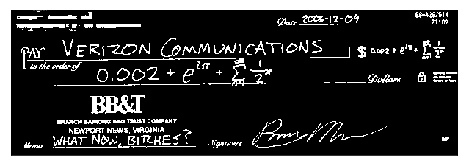

In [3]:
BW = check<125

plt.figure(figsize=(8,6))
plt.imshow(BW,cmap='gray'),plt.xticks([]),plt.yticks([])
# plt.savefig('gray_check_150.png',bbox_inches='tight',dpi=300)
plt.show()

## Converting test images to normalized chromaticity coordinates

In [5]:
def RGI(image):
    R = np.float_(image[:,:,0])
    G = np.float_(image[:,:,1])
    B = np.float_(image[:,:,2])
    
    I = np.float_(R+G+B)
    I[I==0] = 100000

    r = R/I
    g = G/I
    b = B/I
    
    return np.float_(r),np.float_(g),np.float_(b)

In [7]:
whole = plt.imread('todoroki.jpg')
patch = plt.imread('blue.png')
im_r,im_g,im_b = RGI(whole)
p_r,p_g,p_b = RGI(patch)

## Main segmentation function

In [8]:
def segmenting(img,limit):
    x,y = np.where(img<limit)
    segment = np.copy(whole)
    segment[x,y,:] = [255,255,255] 
    
    plt.figure(figsize=(18,16))
    plt.subplot(131)
    plt.imshow(img,cmap='gray'),plt.xticks([]),plt.yticks([])

    plt.subplot(132)
    plt.imshow(whole),plt.xticks([]),plt.yticks([])
    
    plt.subplot(133)
    plt.imshow(segment),plt.xticks([]),plt.yticks([])
#     plt.savefig('nonpara_ura.png',dpi=300,bbox_inches='tight')
    plt.show()

## Parametric Segmentation

In [9]:
def prob(whole,part):
    sigma = np.std(part)
    mean = np.mean(part)
    
    coeff = 1/(sigma*np.sqrt(2*np.pi))
    exp = ((whole-mean)**2)/(2*(sigma**2))
               
    return coeff*np.exp(-exp)

In [10]:
pr = prob(im_r,p_r)
pg = prob(im_g,p_g)

P = pr*pg
P = np.round(255*P/np.amax(P))

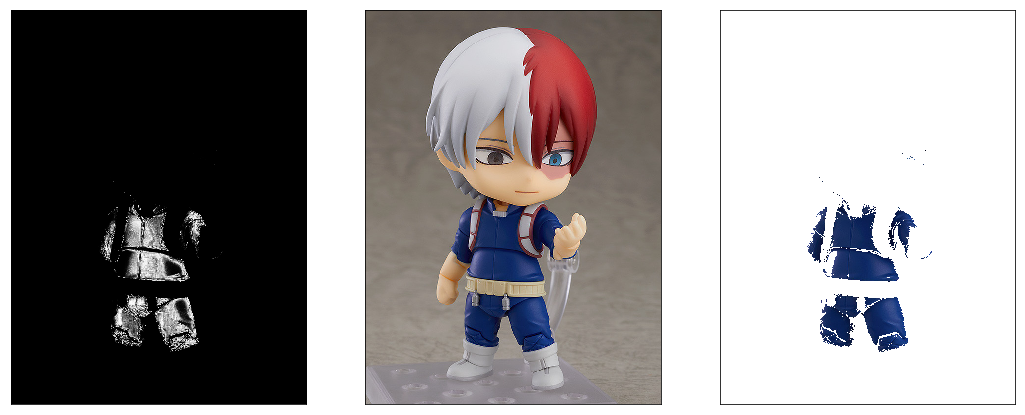

In [11]:
segmenting(P,1)

## Non-parametric Segmentation

In [12]:
def non_para(bins):
    r_int = np.round(p_r*(bins-1))
    g_int = np.round(p_g*(bins-1))
    
    R_int = np.round(im_r*(bins-1)+1)
    G_int = np.round(im_g*(bins-1)+1)
    
    return r_int,g_int,R_int,G_int

## 2D histogram of color patches (regions of interest)

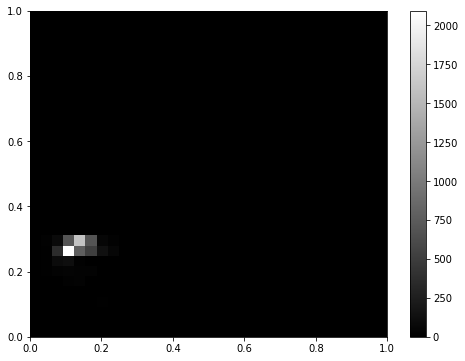

In [13]:
bins = 32
r_int,g_int,R_int,G_int = non_para(bins)

plt.figure(figsize=(8,6))
h = plt.hist2d(r_int.flatten()/bins,g_int.flatten()/bins,bins=bins,range=[[0,1],[0,1]],cmap='gray')[0]
plt.colorbar()
# plt.savefig('ura_hist.png',dpi=300,bbox_inches='tight')
plt.show()

## Histogram Backprojection

In [14]:
new_img = np.zeros((whole.shape[0],whole.shape[1]))

for i in range(whole.shape[0]-1):
    for j in range(whole.shape[1]-1):
        new_img[i][j] += h[np.int(R_int[i][j])-1,np.int(G_int[i][j])-1]

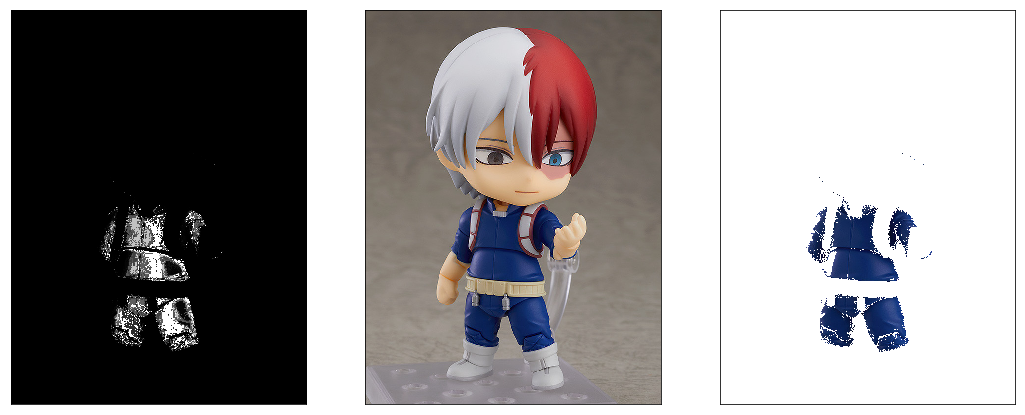

In [15]:
new_img = np.round(255*new_img/np.amax(new_img))
segmenting(new_img,1)

## Pixels of test image in normalized chromaticity space

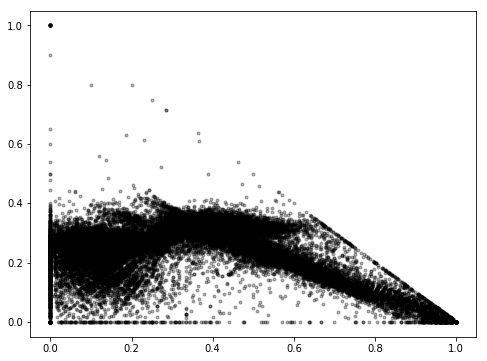

In [16]:
plt.figure(figsize=(8,6))
# plt.title('Whole Image',fontsize=14)
plt.plot(im_r,im_g,'.',color='black',alpha=0.3)
# plt.plot(np.linspace(0,1,10),np.linspace(1,0,10),color='red',linewidth=3)
# plt.savefig('deku_ncc.png',dpi=300,bbox_inches='tight')
plt.show()